conda create --name python_foundation
conda activate python_foundation
conda install geopandas

In [14]:
import os
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point

ModuleNotFoundError: No module named 'matplotlib'

In [9]:
filenames = ['US.txt', 'CA.txt', 'MX.txt']
home_dir = os.path.expanduser('~')

folder = 'Downloads/python_geospatial/'
column_names = ['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature class', 'feature code', 'country code', 'cc2', 'admin1 code', 'admin2 code', 'admin3 code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']

df_list = []
for filename in filenames:
    path = os.path.join(home_dir, folder, filename)
    df = pd.read_csv(path, sep='\t', names=column_names)
    df_list.append(df)
merged_df = pd.concat(df_list, axis=0, ignore_index=True)
display(merged_df)

/Users/ujaval/opt/anaconda3/envs/python_foundation/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/ujaval/opt/anaconda3/envs/python_foundation/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/ujaval/opt/anaconda3/envs/python_foundation/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,geonameid,name,asciiname,alternatenames,latitude,longitude,feature class,feature code,country code,cc2,admin1 code,admin2 code,admin3 code,admin4 code,population,elevation,dem,timezone,modification date
0,2130833,McArthur Reef,McArthur Reef,NaN,52.06667,177.86667,U,RFU,US,NaN,AK,16,NaN,NaN,0,NaN,-9999,Asia/Kamchatka,2016-07-05
1,3577483,The Narrows,The Narrows,The Narrows,18.37502,-64.72517,H,CHN,US,VG,00,NaN,NaN,NaN,0,NaN,-9999,America/St_Thomas,2018-11-06
2,3831601,Nantucket Shoals,Nantucket Shoals,NaN,41.06917,-69.67983,U,SHSU,US,NaN,MA,NaN,NaN,NaN,0,NaN,-9999,NaN,2019-03-18
3,3831610,Little Stellwagen Basin,Little Stellwagen Basin,NaN,42.11667,-70.28333,U,BSNU,US,NaN,00,NaN,NaN,NaN,0,NaN,-9999,America/New_York,2017-05-26
4,3831661,Cashes Ledge,Cashes Ledge,"Cash Ledge,Cashe Ledge",42.91328,-68.95380,U,RDGU,US,NaN,NaN,NaN,NaN,NaN,0,NaN,-9999,NaN,2019-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002254,12158849,Rancho,Rancho,"Rancho,San Martin,San Martín",25.80089,-100.38209,P,PPLX,MX,NaN,19,NaN,NaN,NaN,0,NaN,551,America/Monterrey,2020-05-11
3002255,12158850,Emporio,Emporio,"Emporio,Tepetitan,Tepetitán",17.77891,-92.42383,P,PPL,MX,NaN,27,NaN,NaN,NaN,0,NaN,22,America/Mexico_City,2020-05-11
3002256,12158851,Zeta,Zeta,"El Trebol,El Trébol,Zeta",15.78197,-93.43607,P,PPL,MX,NaN,5,NaN,NaN,NaN,0,NaN,11,America/Mexico_City,2020-05-11
3002257,12158853,Cotztitla,Cotztitla,"Cotztitla,San Jose Cotztitla,San José Cotztitla",18.94229,-97.62164,P,PPL,MX,NaN,21,NaN,NaN,NaN,0,NaN,2284,America/Mexico_City,2020-05-11


In [11]:

mountains = merged_df[merged_df['feature class']=='T']

geometry = [Point(xy) for xy in zip(mountains.longitude, mountains.latitude)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(mountains, crs=crs, geometry=geometry)

output_filename = 'mountains.gpkg'
output_path = os.path.join(home_dir, folder, output_filename)

gdf.to_file(driver='GPKG', filename=output_path, encoding='utf-8')

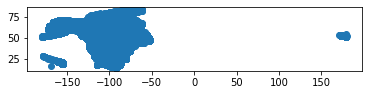

In [15]:
gdf.plot()